# Assignment 10
#### - Ishtpreet Singh, 102316043

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaion using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribution (excluding stopwords).

In [1]:
import re, nltk.data
from nltk.tokenize import word_tokenize


paragraph = """
Formula 1, often abbreviated as F1, is the pinnacle of motorsport, captivating fans worldwide with its blend of speed, technology, and strategy. 
Each season, teams and drivers compete on iconic circuits, pushing the limits of engineering and human skill. Ishtpreet
The roar of the engines, the precision of pit stops, and the drama of overtakes make every race thrilling.
Innovations in aerodynamics and hybrid power units showcase the sport's commitment to progress.
Legendary drivers like Lewis Hamilton and Michael Schumacher have become household names.
F1 continues to evolve, inspiring new generations of fans and engineers alike.
"""
#  1.
paragraph_clean = paragraph.lower()
paragraph_clean = re.sub(r'[^\w\s]', '', paragraph_clean) # via https://www.youtube.com/watch?v=hxU3HLX1W1k
print(f"1.{paragraph_clean}")

# 2.
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = sent_tokenizer.tokenize(paragraph_clean)
print(f"2. Sentences : {sentences}")

words = word_tokenize(paragraph_clean)
print(f"2. Words : {words}")

# 3.
split_words = paragraph_clean.split()
print(f"3. Python split(): {split_words}")
print(f"3. NLTK word_tokenize(): {words}")
# Comparison: split() splits on whitespaces only, does not handle where as word_tokenize(043) splits punctuation into seperate tokens - Ishtpreet

1.
formula 1 often abbreviated as f1 is the pinnacle of motorsport captivating fans worldwide with its blend of speed technology and strategy 
each season teams and drivers compete on iconic circuits pushing the limits of engineering and human skill ishtpreet
the roar of the engines the precision of pit stops and the drama of overtakes make every race thrilling
innovations in aerodynamics and hybrid power units showcase the sports commitment to progress
legendary drivers like lewis hamilton and michael schumacher have become household names
f1 continues to evolve inspiring new generations of fans and engineers alike

2. Sentences : ['\nformula 1 often abbreviated as f1 is the pinnacle of motorsport captivating fans worldwide with its blend of speed technology and strategy \neach season teams and drivers compete on iconic circuits pushing the limits of engineering and human skill ishtpreet\nthe roar of the engines the precision of pit stops and the drama of overtakes make every race thr

Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmatization with WordNetLemmatizer
5. Compare the stemmed and lemmaiozed outputs and explain when you’d prefer one over
the other.

In [2]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# 1.
alpha_words = re.findall(r'\b[a-zA-Z]+\b', paragraph_clean)
print(f"1: {alpha_words}")

# 2.
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alpha_words if word not in stop_words]
print(f"2: {filtered_words}")

# 3.
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in filtered_words]
print(f"3: {stemmed_words}")

# 4.
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print(f"4: {lemmatized_words}")

# 5. I, Isht would personally prefer lemmatization because words by stemming are a little non conventional, where as 
# lemmatized words are more readable and would be benefitial for human analysis

1: ['formula', 'often', 'abbreviated', 'as', 'is', 'the', 'pinnacle', 'of', 'motorsport', 'captivating', 'fans', 'worldwide', 'with', 'its', 'blend', 'of', 'speed', 'technology', 'and', 'strategy', 'each', 'season', 'teams', 'and', 'drivers', 'compete', 'on', 'iconic', 'circuits', 'pushing', 'the', 'limits', 'of', 'engineering', 'and', 'human', 'skill', 'ishtpreet', 'the', 'roar', 'of', 'the', 'engines', 'the', 'precision', 'of', 'pit', 'stops', 'and', 'the', 'drama', 'of', 'overtakes', 'make', 'every', 'race', 'thrilling', 'innovations', 'in', 'aerodynamics', 'and', 'hybrid', 'power', 'units', 'showcase', 'the', 'sports', 'commitment', 'to', 'progress', 'legendary', 'drivers', 'like', 'lewis', 'hamilton', 'and', 'michael', 'schumacher', 'have', 'become', 'household', 'names', 'continues', 'to', 'evolve', 'inspiring', 'new', 'generations', 'of', 'fans', 'and', 'engineers', 'alike']
2: ['formula', 'often', 'abbreviated', 'pinnacle', 'motorsport', 'captivating', 'fans', 'worldwide', 'ble

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representation.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

texts = [
    "Max Verstappen continues to impress fans with his fearless driving and sharp racecraft, consistently pushing the limits on every circuit.",
    "Ayrton Senna's legacy lives on through his unmatched passion for racing and his relentless pursuit of perfection on the track.",
    "Fernando Alonso showcases remarkable adaptability, excelling in various racing disciplines and inspiring a new generation of motorsport enthusiasts."
]

# 1.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
# via https://www.datacamp.com/tutorial/python-bag-of-words-model
# Print the generated vocabulary
print("Vocabulary:", vectorizer.get_feature_names_out())
# Print the Bag-of-Words matrix
print("BoW Representation:")
print(X.toarray())

# 2. via https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
print("\n\nTF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

# 3.
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, row in enumerate(tfidf_matrix):
    scores = row.toarray().flatten()
    top3 = scores.argsort()[-3:][::-1]
    print(f"Text {i+1} Top 3 Keywords:")
    for idx in top3:
        print(f"  {feature_names[idx]}: {scores[idx]}")

Vocabulary: ['adaptability' 'alonso' 'and' 'ayrton' 'circuit' 'consistently'
 'continues' 'disciplines' 'driving' 'enthusiasts' 'every' 'excelling'
 'fans' 'fearless' 'fernando' 'for' 'generation' 'his' 'impress' 'in'
 'inspiring' 'legacy' 'limits' 'lives' 'max' 'motorsport' 'new' 'of' 'on'
 'passion' 'perfection' 'pursuit' 'pushing' 'racecraft' 'racing'
 'relentless' 'remarkable' 'senna' 'sharp' 'showcases' 'the' 'through'
 'to' 'track' 'unmatched' 'various' 'verstappen' 'with']
BoW Representation:
[[0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0
  0 0 1 0 1 0 1 0 0 0 1 1]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 0 1 0 0 0 1 2 1 1 1 0 0 1 1
  0 1 0 0 1 1 0 1 1 0 0 0]
 [1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
  1 0 0 1 0 0 0 0 0 1 0 0]]


TF-IDF Feature Names: ['adaptability' 'alonso' 'and' 'ayrton' 'circuit' 'consistently'
 'continues' 'disciplines' 'driving' 'enthusiasts' 'every' 'excelling'
 'fans' 'fearless' 'fernando' '

Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
   - a. Jaccard Similarity using sets
   - b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
   - c. Analyze which similarity metric gives better insights in your case.

In [4]:
import re
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity

text1 = """Artificial Intelligence (AI) enables machines to mimic human intelligence and perform tasks such as learning, reasoning, and problem-solving. 
AI systems use algorithms and large datasets to recognize patterns, make predictions, and automate decision-making. 
Applications of AI include natural language processing, computer vision, and robotics. 
AI is transforming industries by increasing efficiency and enabling new capabilities."""

text2 = """Blockchain is a decentralized digital ledger that records transactions across multiple computers securely and transparently. 
It uses cryptographic techniques to ensure data integrity and prevent unauthorized changes. 
Blockchain technology underpins cryptocurrencies like Bitcoin and enables smart contracts. 
Its applications extend to supply chain management, voting systems, and digital identity verification."""

# 1.
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

text1_clean = preprocess(text1)
text2_clean = preprocess(text2)

tokens1 = word_tokenize(text1_clean)
tokens2 = word_tokenize(text2_clean)

print("Tokens for Text 1:", tokens1)
print("Tokens for Text 2:", tokens2)

# 2a.
set1 = set(tokens1)
set2 = set(tokens2)
intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_similarity = len(intersection) / len(union)
print("Jaccard Similarity:", jaccard_similarity)

# 2b.
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1_clean, text2_clean])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print("Cosine Similarity:", cos_sim)

# 2c. Jacardi is strict for long texts whereas cosine gives better insights because it takes term importance and overlapping in account - 043 C2

Tokens for Text 1: ['artificial', 'intelligence', 'ai', 'enables', 'machines', 'to', 'mimic', 'human', 'intelligence', 'and', 'perform', 'tasks', 'such', 'as', 'learning', 'reasoning', 'and', 'problemsolving', 'ai', 'systems', 'use', 'algorithms', 'and', 'large', 'datasets', 'to', 'recognize', 'patterns', 'make', 'predictions', 'and', 'automate', 'decisionmaking', 'applications', 'of', 'ai', 'include', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'robotics', 'ai', 'is', 'transforming', 'industries', 'by', 'increasing', 'efficiency', 'and', 'enabling', 'new', 'capabilities']
Tokens for Text 2: ['blockchain', 'is', 'a', 'decentralized', 'digital', 'ledger', 'that', 'records', 'transactions', 'across', 'multiple', 'computers', 'securely', 'and', 'transparently', 'it', 'uses', 'cryptographic', 'techniques', 'to', 'ensure', 'data', 'integrity', 'and', 'prevent', 'unauthorized', 'changes', 'blockchain', 'technology', 'underpins', 'cryptocurrencies', 'like', 'bitcoin', 'a

Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all positive reviews.

Polarity: 0.23008021390374334
Subjectivity: 0.5796791443850268
VADER Scores: {'neg': 0.08, 'neu': 0.688, 'pos': 0.232, 'compound': 0.875}
VADER Sentiment: Positive


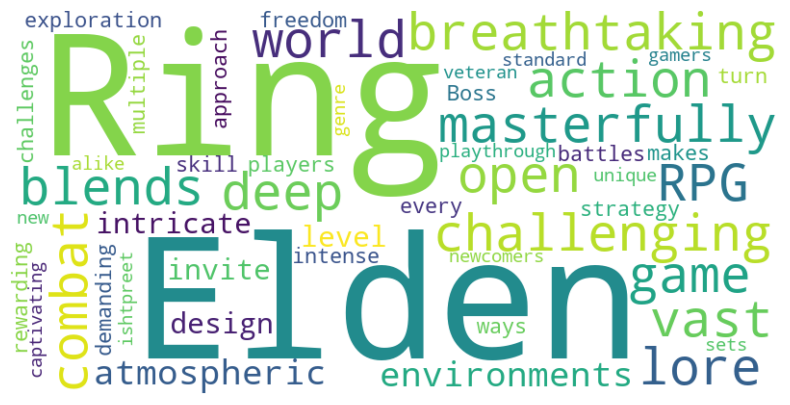

In [5]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "Elden Ring is a breathtaking action RPG that masterfully blends challenging combat, a vast open world, and deep lore. The game's atmospheric environments and intricate level design invite exploration at every turn. Boss battles are intense and rewarding, demanding skill and strategy from players. The freedom to approach challenges in multiple ways makes each playthrough unique ( ishtpreet ). Elden Ring sets a new standard for the genre, captivating both newcomers and veteran gamers alike."

# 1. using textblob 
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")

# 1. using vader
vader = SentimentIntensityAnalyzer()
vader_scores = vader.polarity_scores(review)
print(f"VADER Scores: {vader_scores}")

# 2. 
compound = vader_scores['compound']
if compound >= 0.05:
    sentiment = "Positive"
elif compound <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print(f"VADER Sentiment: {sentiment}")

# 3. 

# For demonstration, let's assume we only have one review and it's positive
positive_reviews = [review] if sentiment == "Positive" else []

if positive_reviews:
    text = " ".join(positive_reviews)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No positive reviews to display in word cloud.")

Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starting from any seed word you
provide.

In [9]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np

linus_paragraph = """
    Linus Tech Tips is a popular YouTube channel and media brand founded by Linus Sebastian.
    Known for its engaging and informative technology content, the channel covers a wide range of topics including PC hardware reviews, build guides, and industry news. 
    Linus and his team present complex tech concepts in a fun and accessible way, making technology approachable for both enthusiasts and beginners. 
    Their entertaining videos often feature product unboxings, performance benchmarks, and creative experiments. 
    With millions of subscribers, Linus Tech Tips has become a trusted source for tech advice, helping viewers make informed decisions about the latest gadgets and innovations.
"""

# 1. Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([linus_paragraph])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in linus_paragraph.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(2, len(token_list)+1):
        n_gram_sequence = token_list[:i]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = np.zeros((len(labels), total_words))
for i, label in enumerate(labels):
    ys[i, label] = 1

# 2. Build a simple LSTM model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(LSTM(50))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train the model
model.fit(xs, ys, epochs=200, verbose=0)

# Generate new text
seed_text = "linus"
next_words = 15
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed_text += " " + word
            break

print("Generated text:")
print(seed_text)

C:\Users\Ishtpreet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Generated text:
linus tech tech tips tips has a a trusted source source for advice advice helping helping
